---
Este é o meu primeiro projeto de análise de dados usando pandas e jupyter.

Neste notebook, irei registrar aquilo que eu for aprendendo e também a linha de raciocínio que foi tomada em cada decisão.

É importante mencionar que o principal objetivo deste notebook não é alguma análise específica, mas sim aprender mais sobre pandas, numpy e python em geral. Assim, o tom aqui irá assumir um carater extremamente exploratório, as análises serão feitas de forma bem gradativa e lenta e muitos detours serão tomados.

---

## Exploração Inicial

Começo baixando um dataset do Kaggle, entitulado `Walmart.csv` contendo um registo de vendas do Walmart e o colona pasta `data` da raíz do projeto.


In [1]:
import pandas as pd

df = pd.read_csv("data/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


---
**O que aprendemos aqui:**
1. `dataframe` é uma classe da biblioteca `pandas` que representa uma tabela
2. `read_csv` constrói um objeto da classe dataframe a partir de um arquivo .csv
3. `head()` é um método que mostra as primeiras linhas da tabela. Por padrão, mostra as cinco primeiras, mas é possível passar o número de linhas desejado:

**Observação:** `CPI` significa *Consumer Prince Index*, e é um índice relacionado à inflação e ao poder de compra.

---

In [2]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


---
**O que aprendemos aqui:**
- `info()` mostra um resumo estrutural do dataframe, com o número de linhas, número de colunas, tipo de cada uma, etc.
- Índice não conta como coluna

É importante analisar essas informações pois .csv não tem tipo, o pandas *infere* o tipo de cada coluna, e essa inferência deve ser conferida

---

In [4]:
df['Date'] 

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df['Date'].index

RangeIndex(start=0, stop=6435, step=1)

In [7]:
type(df['Date'].index)

pandas.core.indexes.range.RangeIndex

In [8]:
df['Date'].values

array(['05-02-2010', '12-02-2010', '19-02-2010', ..., '12-10-2012',
       '19-10-2012', '26-10-2012'], shape=(6435,), dtype=object)

In [9]:
type(df['Date'].values)

numpy.ndarray

---
**O que aprendemos aqui:**

- `Series` é uma classe do pd que representa uma lista *rotulada*
- cada Series possui duas partes:
  1. os índices, que são acessíveis via `.index`, da classe `RangeIndex` (própria do pandas)
  2. os valores, acessíveis via `.values`, da classe `ndarray` (do NumPy)
- `df['coluna']` retorna a Series da coluna especificada

---

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


---
**O que aprendemos aqui:**

- `to_datetime` converte uma Series numa Series, com o tipo correto de data para o pandas (no caso, `datetime64[ns]` do numpy)
- note que ao mudar a Series, mudamos o dataframe de onde ela vem
- é muito importante que as datas estejam com o tipo correto para poder usar os métodos e fazer análises corretas

---

In [11]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


---
**O que aprendemos aqui:**

-- `describe()` calcula estatísticas coluna a coluna
- Para tomar o transposto de um dataframe, basta fazer `.T`

---

**O que faremos a seguir:**

Tentar plotar os dados de vendas para ver se há algum padrão ou tendência geral.

---

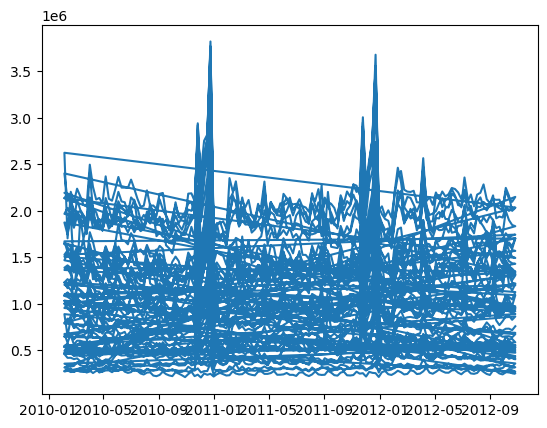

In [13]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Weekly_Sales'])

---
**O que pode ter dado errado aqui:**

Hipótese: o fato da tabela conter dados de mais de uma loja pode ter criado uma superposição indesejada. Além do mais os dados podem estar sendo organizados de forma lexicográfica por (loja, data), o que seria responsável pelas linhas horizontais conectando o fim do gráfico ao início.
    
---
**O que podemos fazer?**

- filtrar apenas uma loja
- agrupar lojas diferentes para obter um total de vendas
---

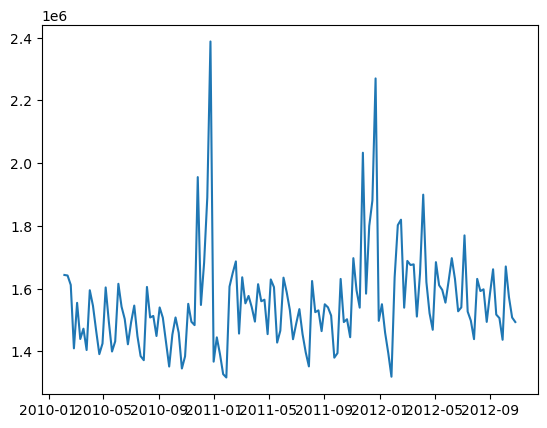

In [14]:
df1 = df[df['Store'] == 1]

plt.plot(df1['Date'], df1['Weekly_Sales'])
plt.show()

---
**O que aprendemos aqui:**

- podemos usar uma condição dentro dos colchete `[]` para retornar um outro dataframe
- por baixo dos panos, construímos uma Series de valores booleanos
---

In [15]:
total_sales = df.groupby('Date')['Weekly_Sales'].sum()
total_sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

---
**O que aprendemos aqui:**

- A utilizar `group by` e `sum` com pandas.
- O resultado é uma Series indexada pela coluna que foi agrupada
---

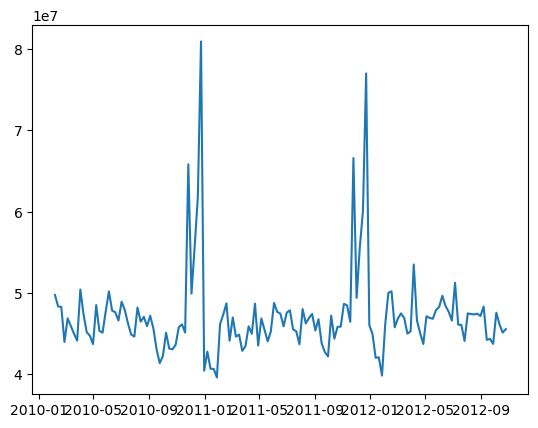

In [16]:
plt.plot(total_sales)

<Axes: xlabel='Date'>

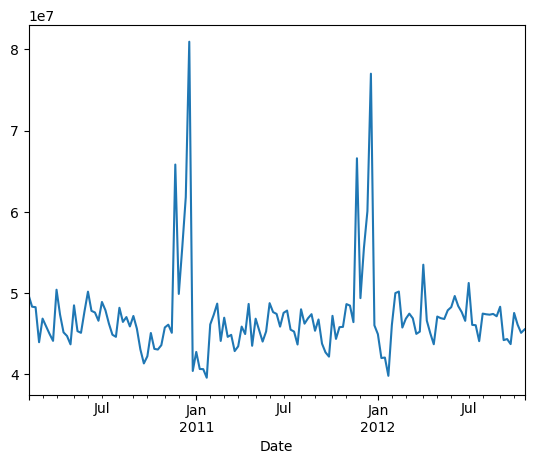

In [17]:
total_sales.plot()

---
**O que aprendemos aqui:**

- quando fazemos `plt.plot(series)`, ele toma o index como eixo x e o values como eixo y
- mesmo assim, é bem melhor usar o método `plot()`, próprio das Series: note que a formatação dos eixos está bem melhor
---
**O que iremos fazer:**

- iremos começar trabalhando com os dados filtrados pela loja 1, pois os dados agrupados podem misturar tendências diversas, dificultando a análise.
- para plotar as vendas semanais usando o plot() do pandas, precisamos construir uma Series indexada pelas datas, à semelhança do que aconteceu fortuitamente com total_sales
---

In [18]:
df1.set_index('Date')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


--- 
**O que aprendemos aqui:**

- `set_index('coluna')` remove a coluna especificada do conjunto de colunas e a transforma num índice.
- retorna um dataframe
- o índice não precisa ser único, mas isso pode dar problemas

Juntando diversas coisas que aprendemos, podemos fazer:
  
---

<Axes: xlabel='Date'>

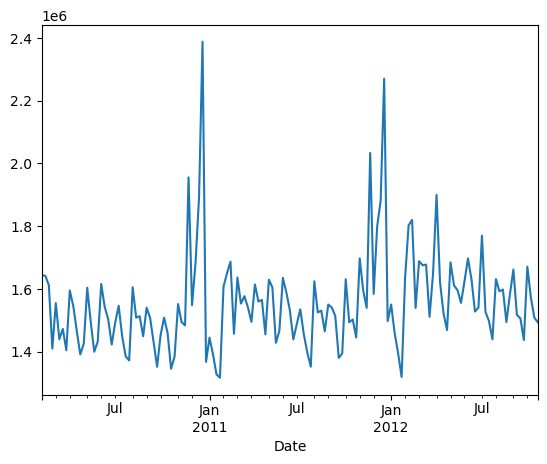

In [19]:
df1.set_index('Date')['Weekly_Sales'].plot()

---
**Conclusões até aqui:**

Observamos que os dados possuem uma fortíssima sazonalidade, tanto com períodos mensais (as pequenas ondas) quanto anuais (os grandes picos). Assim, jeitos simples de modelagem, como regressão linear, se mostram ineficientes.

---
**O que faremos a seguir:**

Antes de buscar métodos mais complexos de modelagem, para previsão estatística, vamos analisar algumas outras coisas. Por exemplo:

1. a taxa de desemprego influencia signficativamente nas vendas?
2. o comportamento das vendas em diferentes lojas é similar ou diferente?
3. Como são as médias móveis mensais?

Começaremos tentando responder a primeira pergunta

---


## 1. Correlação entre vendas e desemprego

In [20]:
df1 = df1.set_index('Date')
df1[['Weekly_Sales', 'Unemployment']]

,Weekly_Sales,Unemployment
Date,,
2010-02-05,1643690.90,8.106
2010-02-12,1641957.44,8.106
2010-02-19,1611968.17,8.106
2010-02-26,1409727.59,8.106
2010-03-05,1554806.68,8.106
...,...,...
2012-09-28,1437059.26,6.908
2012-10-05,1670785.97,6.573
2012-10-12,1573072.81,6.573


<Axes: xlabel='Date'>

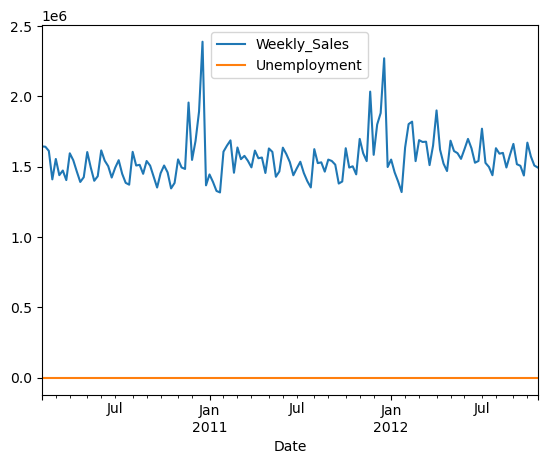

In [21]:
df1[['Weekly_Sales', 'Unemployment']].plot()

<Axes: xlabel='Date'>

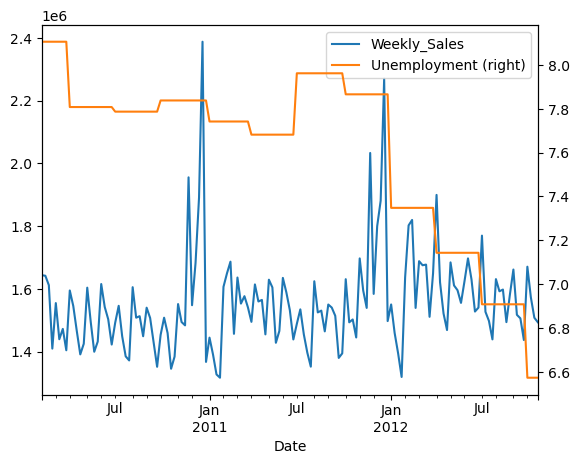

In [22]:
df1[['Weekly_Sales', 'Unemployment']].plot(secondary_y = 'Unemployment')

---
**O que aprendemos aqui:**

- devemos usar colchetes duplos `[[]]` para selecionar mais de uma coluna, criando um novo dataframe
- o `plot()` plota uma linha para cada coluna do dataframe
- é possível colocar uma segunda escala do lado direito
---

**O que podemos concluir?**

No período analisado, houve uma grande queda no desemprego. Visualmente, essa queda parece ter se refletido em um certo aumento nas médias de vendas. Para realmente ter uma noção dessa correlação, precisaríamos de uma abordagem quantitativa. Apesar da usabilidade dos coeficientes de Pearson e Spearman ser extremamente questionável aqui*, vamos ver o que obtemos.

*O coeficiente de Peason faz sentido quando duas variáveis aleatórias possuem uma relação de dependência linear. No nosso caso, a quantidade de vendas pode depender tanto do período do mês quanto da taxa de desemprego. Naturalmente, a dependência entre a quantidade de vendas e a taxa de desemprego é altamente não linear, mas no caso em que a taxa de desemprego e o período do mês são independentes, o coeficiente de Pearson pode dar algo que faz sentido. Uma análise estatística mais aprofundada seria necessária aqui.

---

In [23]:
df1['Weekly_Sales'].corr(df1['Unemployment'], method='pearson')



np.float64(-0.09795539472957952)

In [24]:
df1['Weekly_Sales'].corr(df1['Unemployment'], method='spearman')


np.float64(-0.17627371608769088)

In [25]:
df1['Weekly_Sales'].corr(df1['Unemployment'], method='kendall')


np.float64(-0.12158027777819531)

**Conclusão:** notamos uma pequena, porém não nula correlação negativa, como esperado.

A seguir, abordaremos a segunda questão listada acima, sobre a variação no perfil de vendas em cada loja.

## 2. Análise do perfil de cada loja

### 2.1 Exibição dos dados

In [26]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

---
**O que aprendemos aqui?**

- `unique()` é um método de Series que devolve uma ndarray com os valores
- respeita a ordem de aparição
---

**O que faremos a seguir?**

Iremos criar um dicionário contendo o dataframe de cada loja, já setando as datas como índices e ordenando de modo crescente.
Lembre-se que a definção de um dicionário usa chaves `{}` e dois-pontos `:`

---

In [27]:
dfs = {
    store: (
        df[df['Store'] == store]
        .set_index('Date')
        .sort_index()
    )
    for store in df['Store'].unique()
}


## pd.concat

- pega um iterável de dataframes ou series (array, dicts, etc)
- possui a opção axis = 0 ou axis = 1
- no primeiro caso, une as colunas e empilha as linhas (mais linhas)
- no segundo caso, une os índices e cola colunas (mais colunas)
- no caso se não possuir valor, retorna NaN

**O que faremos a seguir?**

Utilizaremos essa função para colar os dataframes das diversas lojas. 
Parece que, no jargão da ciência de dados, isso é chamado de transformar uma tabela long em uma tabela wide.
Para efetuar a colagem, é desejável saber se as datas são iguais. Vamos fazer um teste.

In [28]:
dfs[1].index.equals(dfs[2].index)


True

In [29]:
df_wide = pd.concat(
    {store: dfs[store]['Weekly_Sales'] for store in dfs},
    axis=1
)
df_wide.head()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22


A operação que fizemos poderia ter sido mais facilmente implementada utilizando `pivot`:

In [30]:
df_pivot = df.pivot(
    index='Date',
    columns='Store',
    values='Weekly_Sales'
)
df_pivot.head()

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22


Vamos ver se de fato os dois métodos retornaram a mesma coisa.

In [31]:
import numpy as np

df_wide.to_numpy()


array([[1643690.9 , 2136989.46,  461622.22, ...,  647029.28,  281090.95,
         890689.51],
       [1641957.44, 2137809.5 ,  420728.96, ...,  682918.99,  286857.13,
         656988.64],
       [1611968.17, 2124451.54,  421642.19, ...,  658997.55,  267956.3 ,
         841264.04],
       ...,
       [1573072.81, 1900745.13,  410804.39, ...,  619369.72,  337796.13,
         734464.36],
       [1508068.77, 1847990.41,  424513.08, ...,  623919.23,  323766.77,
         718125.53],
       [1493659.74, 1834458.35,  405432.7 , ...,  587603.55,  361067.07,
         760281.43]], shape=(143, 45))

In [32]:
type(df_wide.to_numpy())

numpy.ndarray

In [33]:
np.array_equal(df_wide.to_numpy(), df_pivot.to_numpy())

True

**O que aprendemos aqui:**

- os dataframes possuem um método que os transformam numa ndarray (ignora nomes de linhas e colunas)
- existe um método em numpy que analise se duas ndarrays são iguais.

**O que faremos agora:**

- agora que temos a tabela em seu formato wide, podemos fazer algumas coisas para analisar o perfil de cada loja
- a primeira coisa mais óbvia é plotar cada coluna da tabela num único gráfico.


<Axes: xlabel='Date'>

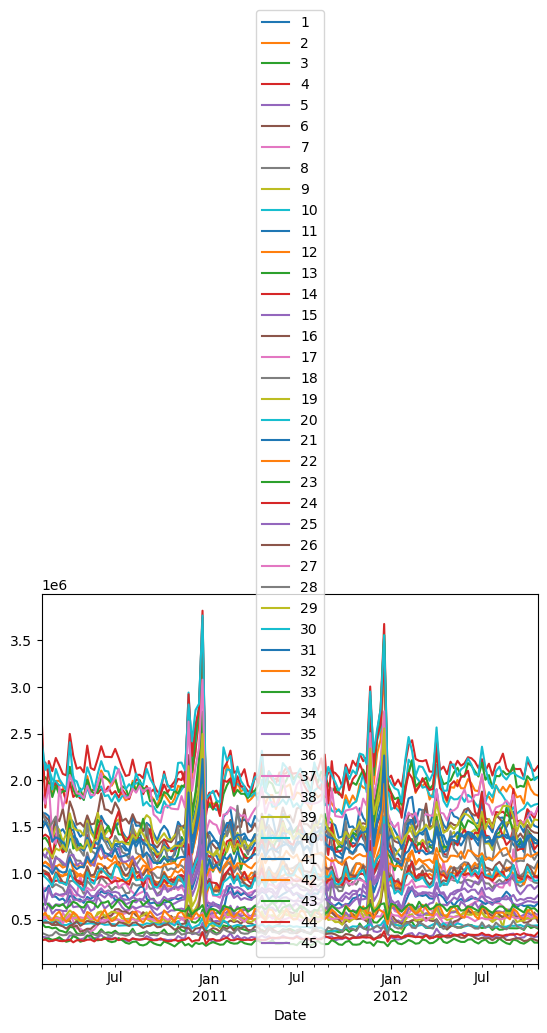

In [34]:
df_wide.plot()

Foi claramente uma ideia estúpida. 45 lojas, 45 linhas, o gráfico fica ilegível, as cores se confunde e a legenda fica mastodôntica. Abaixo, exploraremos possíveis alternativas de representar visualmente o comportamente. O mais óbvio é pegar somente uma parcela das lojas. Para tal, usaremos o método pivot() sobre o qual havíamos comentado.

In [41]:
stores = [1, 2, 3, 4, 5]

df['Store'].isin(stores)

0        True
1        True
2        True
3        True
4        True
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Name: Store, Length: 6435, dtype: bool

In [40]:
type(df['Store'].isin(stores))

pandas.core.series.Series

In [42]:
df[df['Store'].isin(stores)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
710,5,2012-09-28,310141.68,0,78.33,3.666,223.574102,5.603
711,5,2012-10-05,343048.29,0,71.17,3.617,223.774444,5.422
712,5,2012-10-12,325345.41,0,66.24,3.601,223.974787,5.422
713,5,2012-10-19,313358.15,0,69.17,3.594,224.019287,5.422


**O que aprendemos aqui:**

- `isin()` é o método de uma Series que retorna uma Series de booleanos, checa se o valor em cada linha está no range indicado
- novamente, o colchete de um dataframe retorna um sub-dateframe a partir de uma Series de booleanos

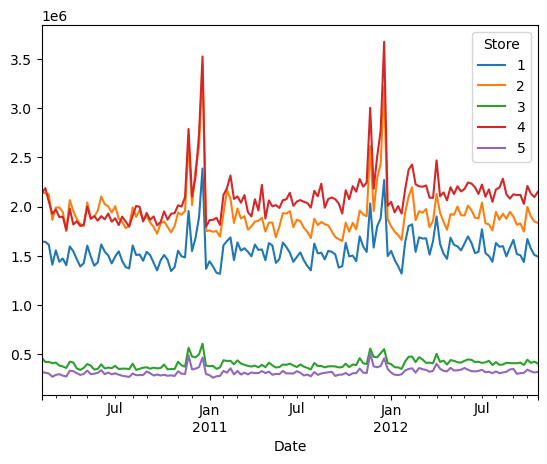

In [35]:

df[df['Store'].isin(stores)] \
  .pivot(index='Date', columns='Store', values='Weekly_Sales') \
  .plot()
plt.show()


*(note o uso de barras para permitir a quebra de linha de código)*

**Conclusão:**

Observamos a presença de heterogeneidade, principalmente na ordem de grandeza das vendas. Para observar se alguma loja foge do padrão típico de pico duplo no final do ano que estamos observando, precisamos de um jeito de visualizar simultaneamente o comportamento de todas as lojas. Para tanto, lançaremos mão de duas ferramentas: subpolot e mapas de calor. 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='D

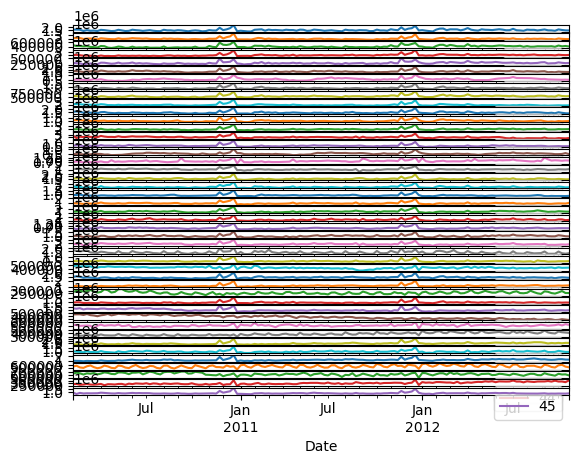

In [45]:
df_pivot.plot(subplots=True)


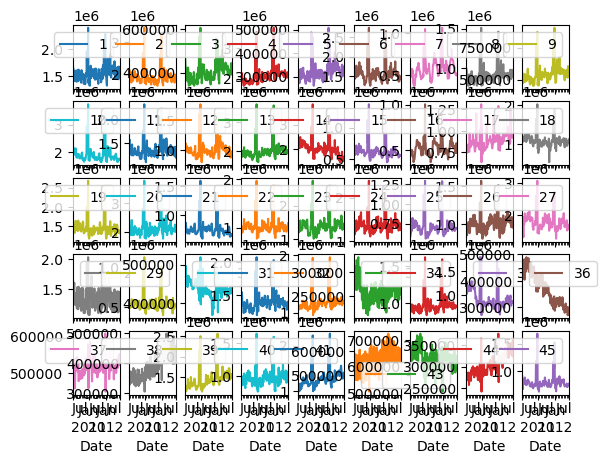

In [53]:
subplot = df_pivot.plot(subplots = True, layout=(5, 9))
plt.show()

In [55]:
type(subplot)

numpy.ndarray

In [58]:
type(subplot[1,1])

matplotlib.axes._axes.Axes

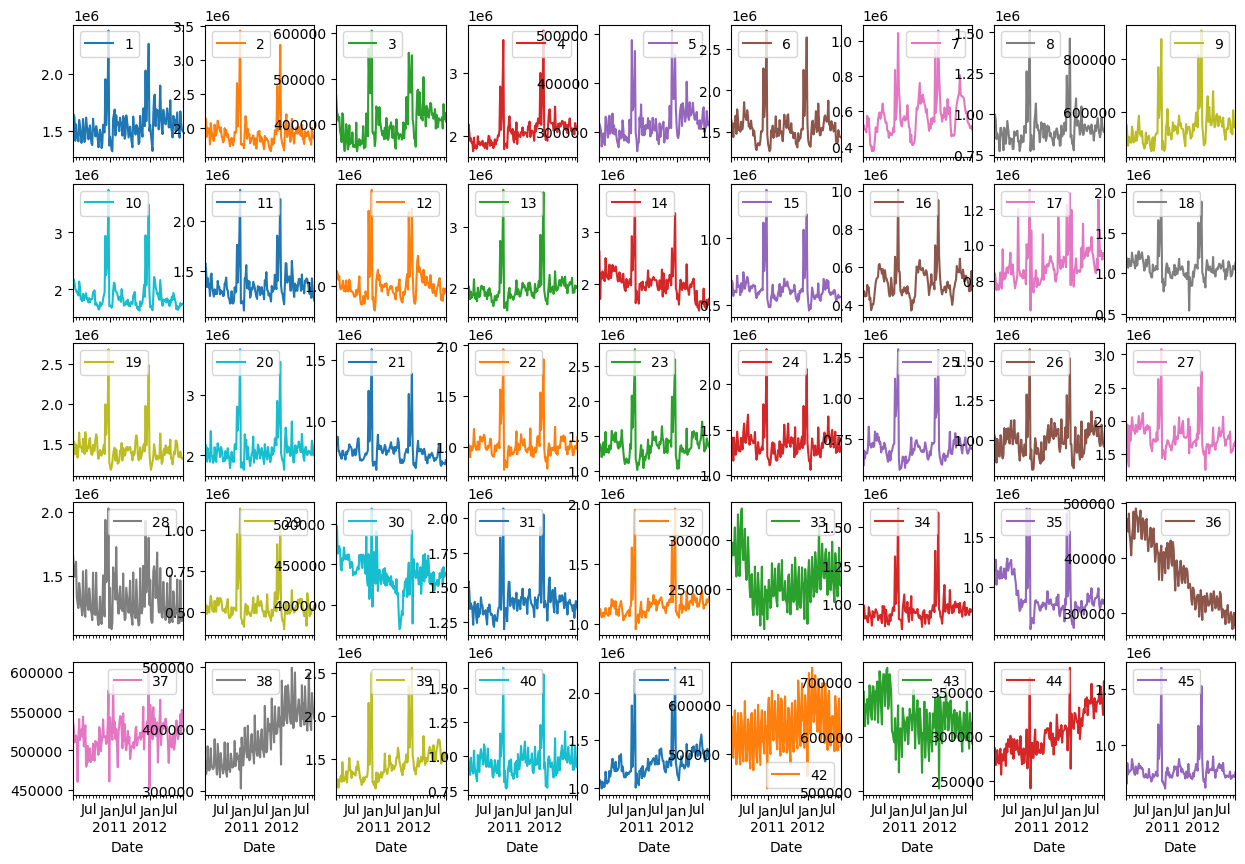

In [49]:
df_pivot.plot(subplots = True, layout=(5, 9), figsize=(15, 10))
plt.show()

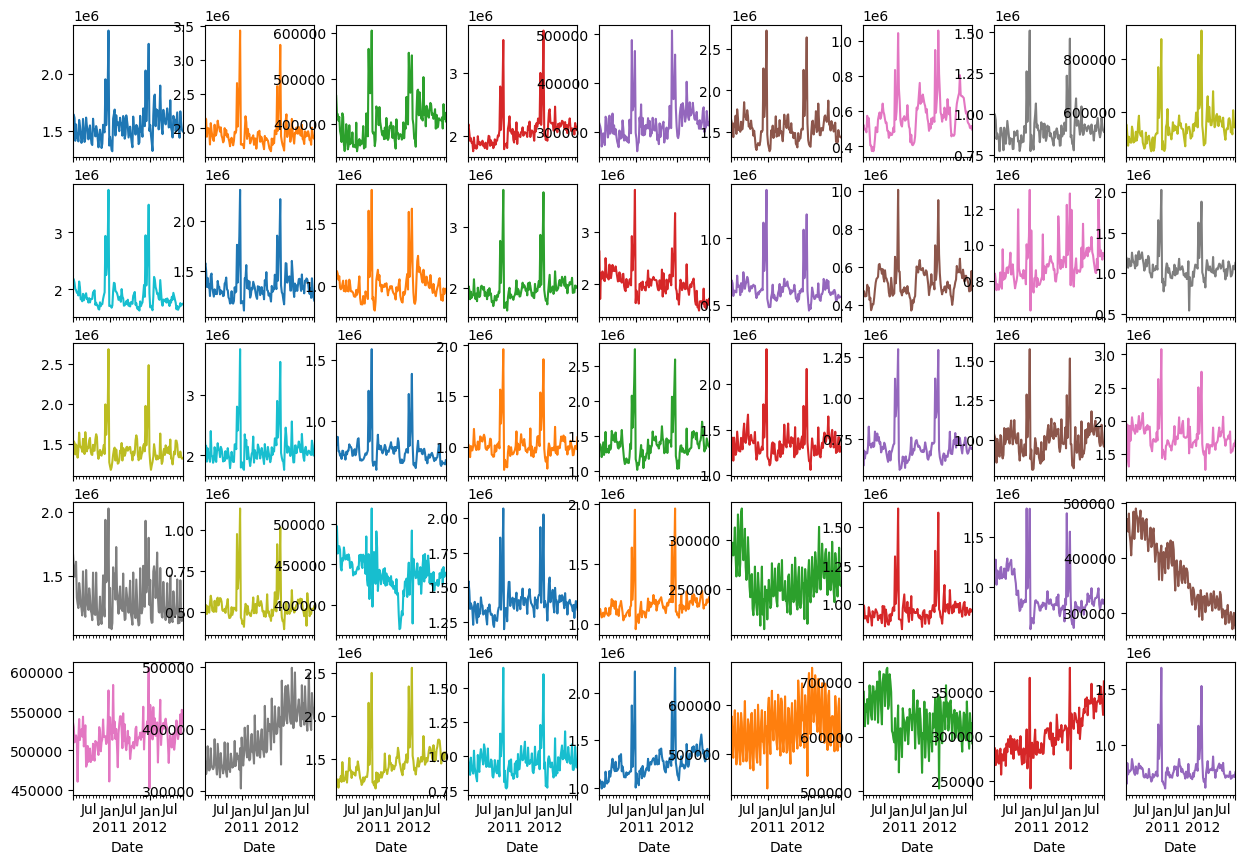

In [68]:
df_pivot.plot(subplots = True, layout=(5, 9), figsize=(15, 10), legend=False)
plt.show()

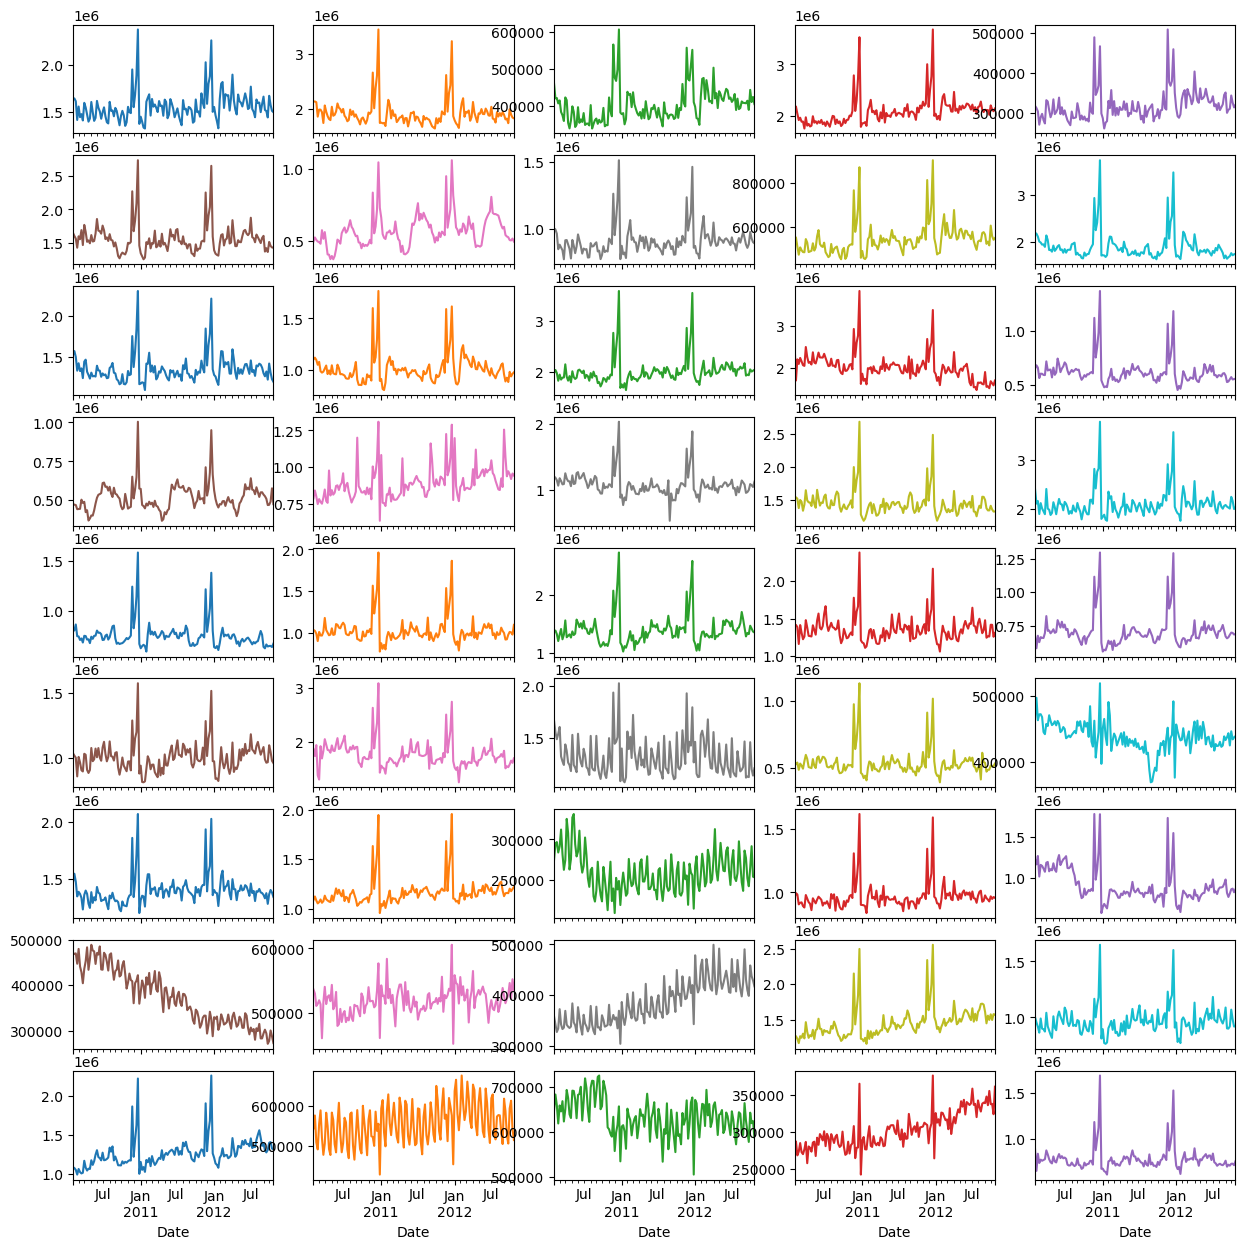

In [72]:
df_pivot.plot(subplots = True, layout=(9, 5), figsize=(15, 15), legend=False)
plt.show()

**O que aprendemos aqui:**

- o parâmetro subplots retorna um ndarray de gráficos (Axes), de modo que cada coluna do df seja plotada em um gráfico separado
- por padrão, o ndarray tem um shape (n,1)
- o parâmetro layout permite reconfigurar o shape do ndarray
- o parâmetro figsize nos permite controlar o tamanho de cada gráfico
- podemos ligar ou desligar legendas



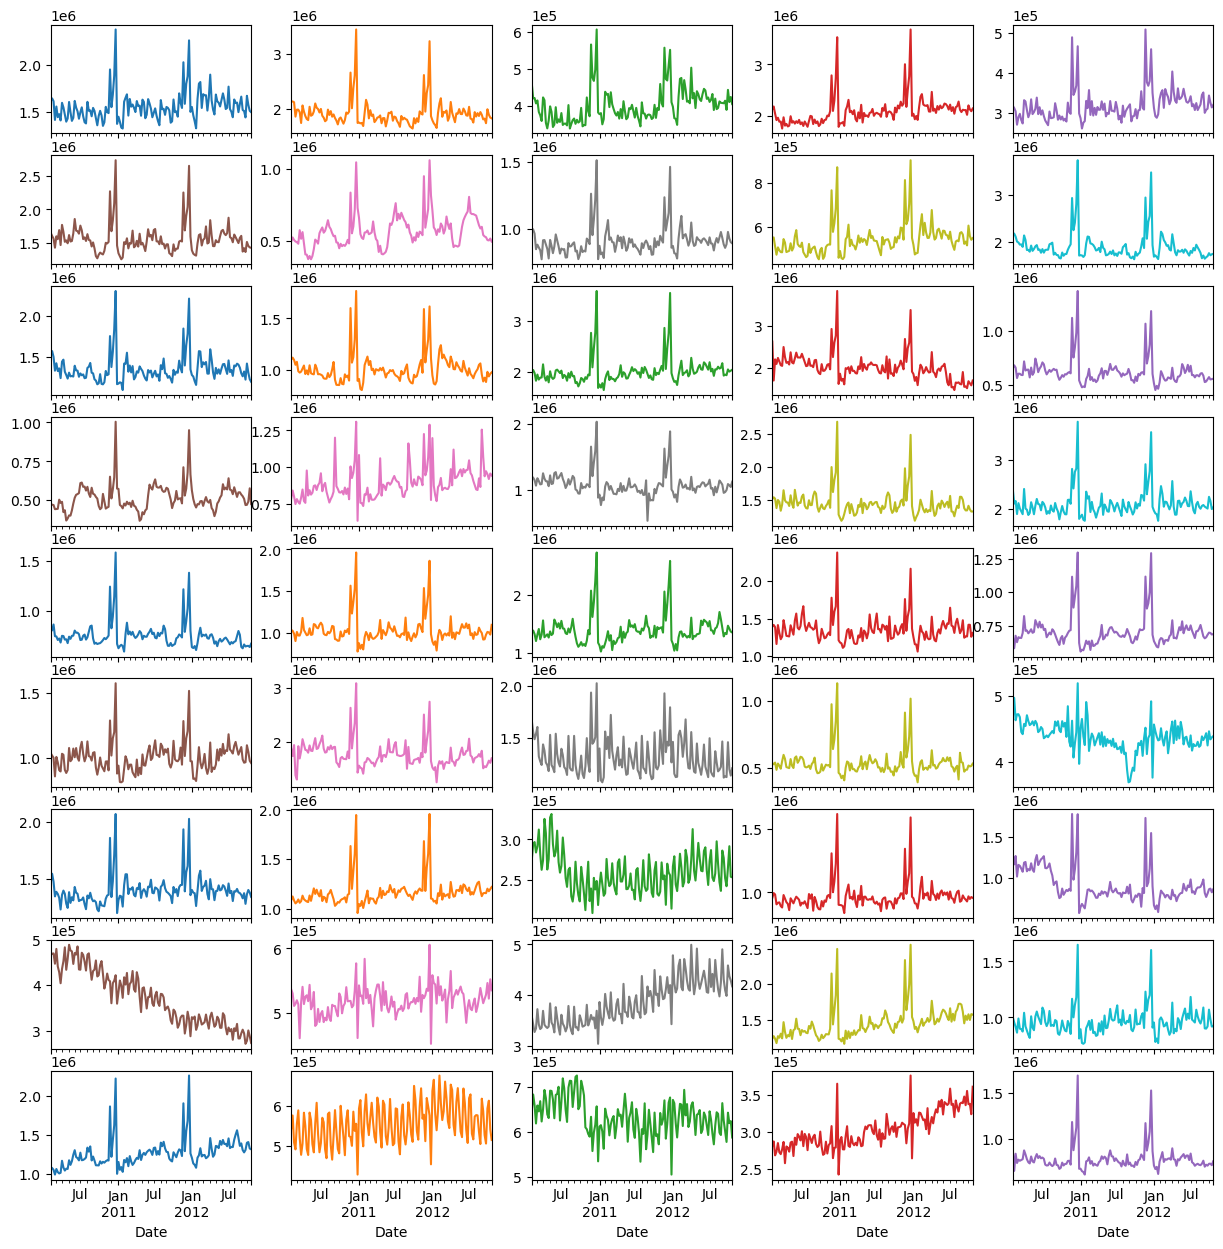

In [78]:
grafs = df_pivot.plot(subplots = True, layout=(9, 5), figsize=(15, 15), legend=False)
for ax in grafs.flat:
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.show()

**O que aprendemos aqui:**

- iterar sobre uma ndarray faz com que a iteração percorra apenas slices da última dimensão da array
- para iterar sobre todos os elementos de uma ndarray, o membro `.flat` retorna um objeto iterável
- ticklabel_format é um método do Axes que formata os labels, os valores escritos ao longo dos eixos
- `scilimits=(n,m)` define o intervalo (expoentes entre n e m) em que notação científica não é usada
---

Uma outra forma de visualizar é utilizando mapas de calor. Para isso, precisaremos da biblioteca seaborn.

<Axes: xlabel='Store', ylabel='Date'>

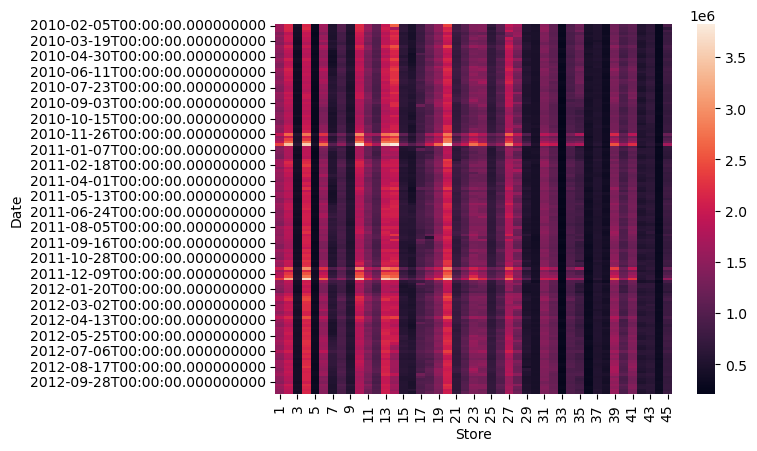

In [79]:
import seaborn as sns

sns.heatmap(df_wide)

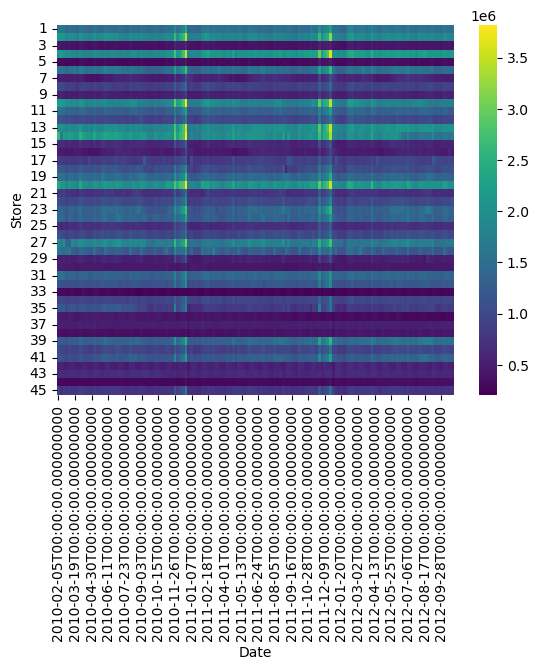

In [80]:
sns.heatmap(df_wide.T, cmap='viridis')
plt.show()


**O que aprendemos aqui:**

- heatmap pega como parâmetro uma matriz 2d (pode ser um ndarray, um dataframe) e faz um mapa de calor
- há diferentes mapas de cores, viridis é um deles

**O que faremos agora:**

alterar a formatação das datas para ficar melhor no heatmap.

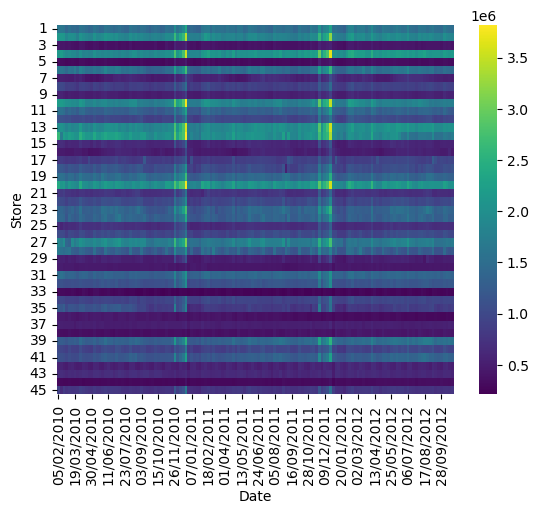

In [83]:
df_heat = df_pivot.copy()
df_heat.index = df_heat.index.strftime('%d/%m/%Y')
sns.heatmap(df_heat.T, cmap='viridis')
plt.show()

**O que aprendemos aqui:**

- `.copy()` é um método que *copia* um df
- `strftime` converte um objeto tipo data (como o `datetime64[ns]` do numpy) em string, de acordo como formato especificado

### 2.2 Clustering

Agora, vamos brevemente explorar os método para *agrupar* as lojas de acordo com seu perfil. A cada loja temos associada uma série temporal (de vendas), e portanto queremos um **time series clustering**.

Naturalmente, uma análise *séria* exigiria um aprofundamento nas vantagens, hipóteses e limitações dos possíveis algoritmos de construção dos clusters. Como nosso exercício agora tem como objetivo principal praticar python e suas bibliotecas de data science, e não um exercício ou pesquisa em estatística, iremos ignorar essas nuances e simplesmente utilizar um dos algoritmos mais clássicos: o `KMeans` do `scikit-learn`.